# Tasmanian Devil Optimizer on decision tree model for predicting fake instagram accounts

In this TP we re gonna apply the **Tasmanian Devil Optimizer** on a **decision tree parameter** to find the best value with best accuracy in predicting fake instagram accounts.


Done by **Farek Khaled Baha Eddine s**.

# Loading libraries

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings('ignore')

#loading dataset
import numpy as np
import pandas as pd

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#import scikitplot as skplt

#data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#data splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#data modeling


#model evaluation
from sklearn.metrics import make_scorer, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Loading and previewing data

In [ ]:
data= pd.read_csv('train.csv')
data


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


# Cleaning data

****

**Check for duplicates and removing them**

In [ ]:
data.duplicated().any()
duplicated = data.duplicated()
data[duplicated]

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
197,1,0.00,2,0.0,0,48,0,0,222,5282,652,0
525,1,0.91,1,0.0,0,0,0,0,0,75,26,1


Duplicates in this case were not really duplicates, but just rows with some of the same values, so we will not remove anything.

****

**Checking for missing values**

This dataset had no missing value.





****

**Outlier Detection**

Outliers are those data points that are significantly diffrent from the rest of the dataset.They are often abnormal observation that skew the data distribution , and arise due to inconsistent data entry, or erroneous abservations.Their presence can distort model training and inference.

Boxplots are often used to detects those outliers.

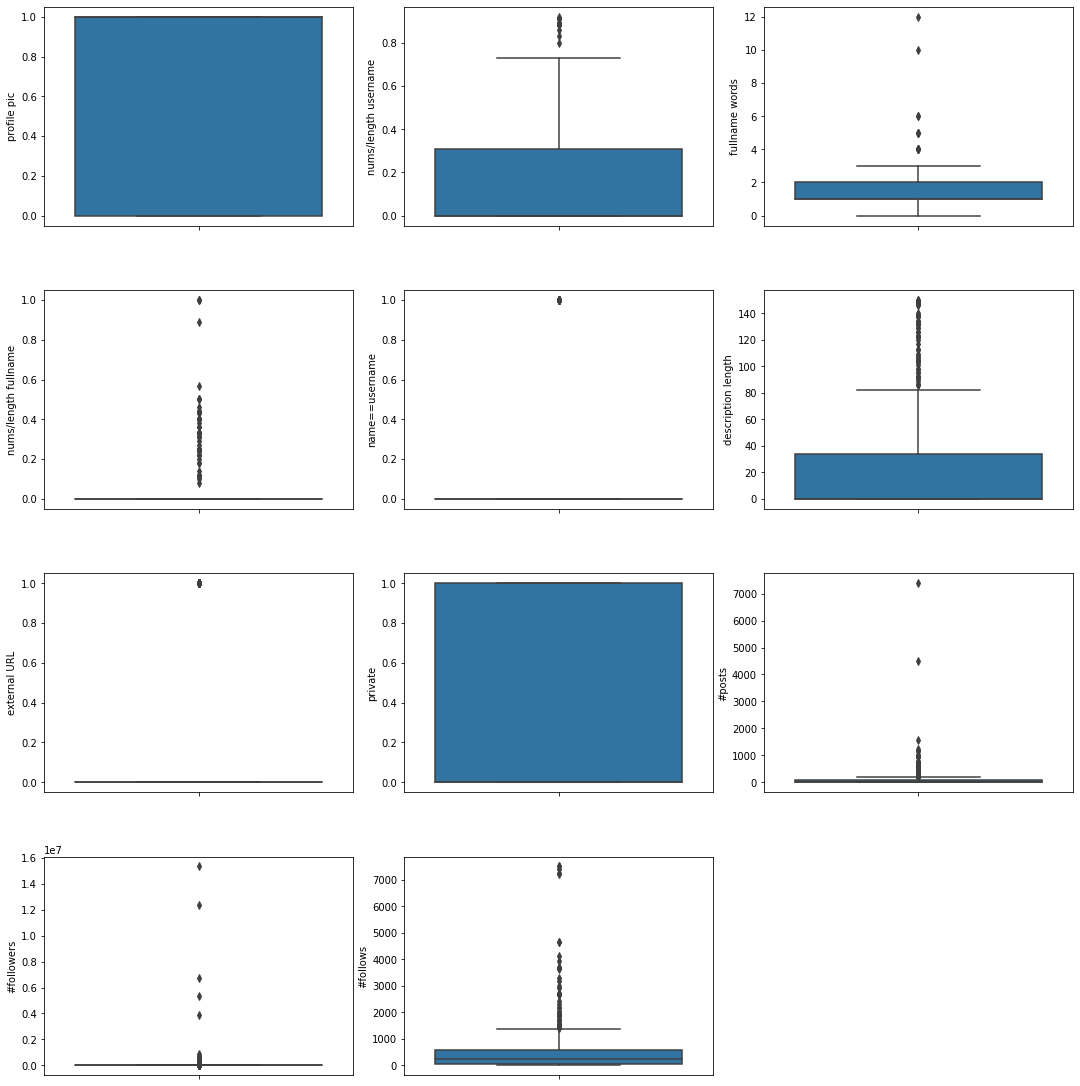

In [ ]:
fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 15))
fig.delaxes(axs[3][2])
idx = 0
axs = axs.flatten()
for k, v in data.items():
    sns.boxplot(y = k, data = data, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

Removing otliers from 
**description length**




In [ ]:
Q1 = np.percentile(data['description length'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['description length'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)

# Upper bound
upper = np.where(data['description length'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['description length'] <= (Q1-1.5*IQR))
print(upper)
 
''' Removing the Outliers '''
data.drop(upper[0] ,inplace = True)

 
print("New Shape: ", data.shape)

Old Shape:  (576, 12)
(array([ 13,  14,  19,  25,  27,  28,  29,  30,  38,  43,  45,  50,  52,
        64, 105, 106, 107, 112, 118, 130, 132, 133, 139, 144, 148, 149,
       153, 161, 164, 165, 172, 173, 176, 193, 194, 198, 205, 209, 213,
       214, 218, 225, 226, 234, 235, 245, 260, 272, 366, 380, 398, 414,
       442]),)
New Shape:  (523, 12)


Removing outliers from **Fullname words**

In [ ]:
Q1 = np.percentile(data['fullname words'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['fullname words'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)

# Upper bound
upper = np.where(data['fullname words'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['fullname words'] <= (Q1-1.5*IQR))
print(upper)
 
''' Removing the Outliers '''
data.drop(upper[0] ,inplace = True)

 
print("New Shape: ", data.shape)

Old Shape:  (523, 12)
(array([  5,  22,  34, 119, 123, 145, 170, 190, 305, 507]),)
New Shape:  (513, 12)


Removing otliers from **#follows**

In [ ]:
Q1 = np.percentile(data['#follows'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['#follows'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)

# Upper bound
upper = np.where(data['#follows'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['#follows'] <= (Q1-1.5*IQR))
print(upper)
 
''' Removing the Outliers '''
data.drop([  7,  15,  24, 48,  69,  71,  73,  74,  91,  94, 109, 121,
         136, 182, 202, 220, 298, 340, 358, 397, 408, 445,
       447, 454, 470, 471, 472, 475, 485])

 
print("New Shape: ", data.shape)

Old Shape:  (513, 12)
(array([  7,  15,  24,  30,  48,  69,  71,  73,  74,  91,  94, 109, 121,
       123, 133, 136, 182, 202, 213, 220, 298, 340, 358, 397, 408, 445,
       447, 454, 470, 471, 472, 475, 485]),)
New Shape:  (513, 12)


****

In [ ]:
data

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


# Preprocessing data



**Seperating the label from the features**




In [ ]:
data_f = data.drop("fake", axis = 1)
data_l = data["fake"]

**Scaling data**

Scaling data means to make all values in all variables within the same range (around 0-1)

In [ ]:
scaler = StandardScaler()
data_f = scaler.fit_transform(data_f)
data_f.mean(), data_f.std()

(2.5183155617937275e-17, 0.9999999999999999)

# Preprocessing test data

In [ ]:
test= pd.read_csv('test.csv')
test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


In [ ]:
test_f = test.drop("fake", axis = 1)
test_l = test["fake"]
scaler = StandardScaler()
test_f = scaler.fit_transform(test_f)
test_f.mean(), test_f.std()

(2.6914497566670462e-17, 1.0)

# Modeling

**Applying Decision tree on or training dataset**

Decision Trees are a type of Supervised Machine Learning (that is you explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter.

The reason was because the decision tree has soem parameters that we can optimize later, like the **max_depth** in which we are gonna apply the **TDO optimizer**

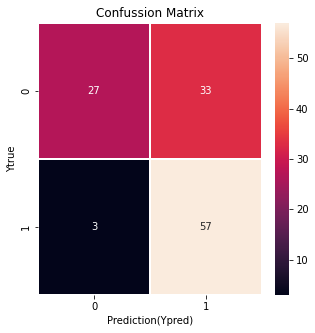



Accuracy of DecisionTreeClassifier: 70.0 

              precision    recall  f1-score   support

           0       0.90      0.45      0.60        60
           1       0.63      0.95      0.76        60

    accuracy                           0.70       120
   macro avg       0.77      0.70      0.68       120
weighted avg       0.77      0.70      0.68       120



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

m = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 8)
dt.fit(data_f, data_l)
dt_predicted = dt.predict(test_f)
dt_conf_matrix = confusion_matrix(test_l, dt_predicted)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dt_conf_matrix,annot = True, linewidths=0.5,fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.title("Confussion Matrix")
plt.show()

dt_acc_score = accuracy_score(test_l, dt_predicted)

print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_l,dt_predicted))



Here we used a **max_depth** of **6** just to test if the optimizer algorithm will do any changes and find a better accuaracy with a better parameter.

The Accuracy here is **74.00%**

# Optimizing using the Tasmanian Devil Optimizer **TDO**

the tasmanian devil picks between two strategies, and for our example we are going to apply it this way:
****

The first is **Feeding by eating carrion**

   basically, it tests the accuracy of the given parameter, if it's better then the last one (which means it's closer to 100%, means bigger), it takes the new accuracy value and advances one more case.

   If not, it keeps the accuracy value and goes backwards.
   ****
The second is **Feeding by eating prey**

It goes after a random prey at first, then if the accuracy is better, it calculates a new position based on the radius variable **R** and keeps moving forwards, if not, it keeps the same value.
   ****

it decides on which strategy to use based on a random value generated each time a new iteration comes.


For this algorithm the parameters are the following:



*   N -----> the number of the population of each parameter.
*   T -----> the number of the iterations.
*   Population is max_depth values.







random value is:  0.05098730866696921
random value is:  0.9304500109562791
random value is:  0.7696439436796172
random value is:  0.21958040028311143
random value is:  0.3743234054415674
random value is:  0.41513036352605903
random value is:  0.6966839035664026
random value is:  0.6799544698992744
random value is:  0.019381025812294506
random value is:  0.5758957178671865
random value is:  0.31688025662657393
random value is:  0.90845522811024
random value is:  0.5889581685464566
random value is:  0.6590205616014558
random value is:  0.2884709620761787
random value is:  0.7644695498591956
random value is:  0.45300604848214865
random value is:  0.8055408549839768
random value is:  0.5781344467285663
random value is:  0.604505500567628
random value is:  0.3500642696817805
random value is:  0.6382258141440136
random value is:  0.7458380002866161
random value is:  0.8214261703761646
random value is:  0.03097640310158234
random value is:  0.07983655130838219
random value is:  0.599604453758

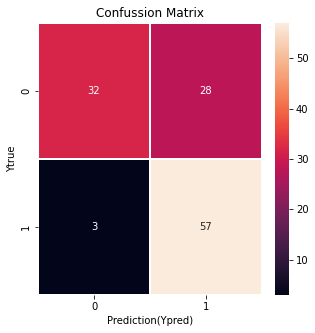



Accuracy of DecisionTreeClassifier: 74.16666666666667 

              precision    recall  f1-score   support

           0       0.91      0.53      0.67        60
           1       0.67      0.95      0.79        60

    accuracy                           0.74       120
   macro avg       0.79      0.74      0.73       120
weighted avg       0.79      0.74      0.73       120



In [ ]:
import random
import math


max_depth = [4,10,8,6]

#max_depth optimization
N=4
T=10

#initialization
p=random.randint(0,N)
position=max_depth[p]
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = position)
dt.fit(data_f, data_l)
dt_predicted = dt.predict(test_f)
dt_acc_score = accuracy_score(test_l, dt_predicted)
calculated_accuracy=dt_acc_score*100
accuracy=calculated_accuracy

#calclating radius used in the second strategy


#loop begins

for t in range(1,T):
  for i in range(0,N):
    pr=random.uniform(0, 1)
    print("random value is: ",pr)
    #testing probability
    if pr<0.5:
      #Strategy 1 feeding by eating carrion 
      dt = DecisionTreeClassifier(criterion = 'entropy',
                                  random_state=0,max_depth = position)
      dt.fit(data_f, data_l)
      dt_predicted = dt.predict(test_f)
      dt_acc_score = accuracy_score(test_l, dt_predicted)
      calculated_accuracy=dt_acc_score*100
      if accuracy > calculated_accuracy:
        accuracy=calculated_accuracy
        p=p+1
        position=max_depth[p]
      else:
        p=p-1  
        position=max_depth[p]
    else:
      #strategy 2 feeding by eating prey
     
      p=random.randint(0,N)
      dt = DecisionTreeClassifier(criterion = 'entropy',
                                  random_state=0,max_depth = position)
      dt.fit(data_f, data_l)
      dt_predicted = dt.predict(test_f)
      dt_acc_score = accuracy_score(test_l, dt_predicted)
      calculated_accuracy=dt_acc_score*100
      if accuracy > calculated_accuracy:
        accuracy=calculated_accuracy
        R=0.01*(1-(t/T))
        R=math.trunc(R)
        p=(p+1)*R
        p=math.trunc(p)
        position=max_depth[p]

#you go ot of the loop with the best position
print('best position is: ', position)



m = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = position)
dt.fit(data_f, data_l)
dt_predicted = dt.predict(test_f)
dt_conf_matrix = confusion_matrix(test_l, dt_predicted)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dt_conf_matrix,annot = True, linewidths=0.5,fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.title("Confussion Matrix")
plt.show()

dt_acc_score = accuracy_score(test_l, dt_predicted)

print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_l,dt_predicted))

As we can see, the **TDO** chose a better **max_depth** for our decision tree and generated a better accuracy of **74.17%**